=== Financial Loss Simulation Result ===


,Brand Damage Rate (η),Expected Enrollment,Fill Rate,Risk Alert,Financial Loss (L),Loss (Display)
0,1%,1980,99.0%,安全圏,24000000.0,0.24 億円
1,2%,1960,98.0%,安全圏,48000000.0,0.48 億円
2,3%,1940,97.0%,安全圏,72000000.0,0.72 億円
3,5%,1900,95.0%,安全圏,120000000.0,1.20 億円
4,8%,1840,92.0%,安全圏,192000000.0,1.92 億円
5,10%,1800,90.0%,安全圏,240000000.0,2.40 億円


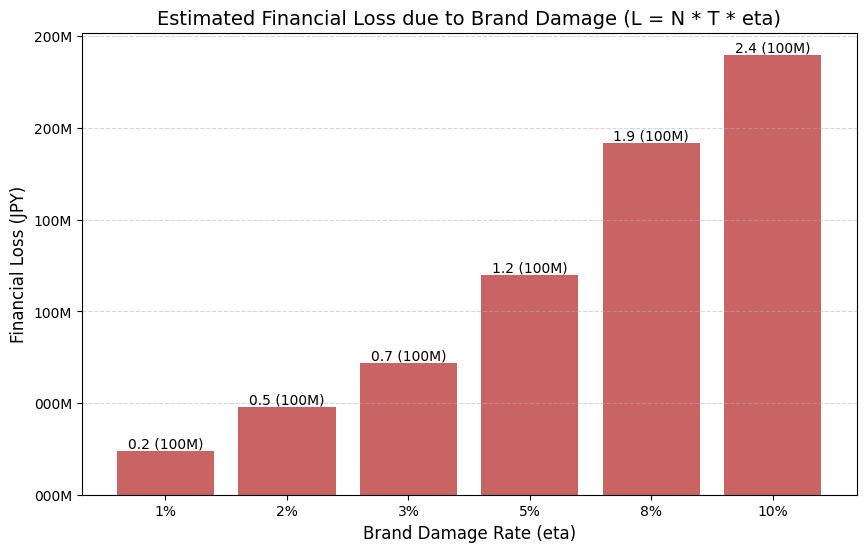

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ■ 大学経営における財務損失シミュレーションモデル
# 目的: ガバナンス不全によるブランド毀損が、入学定員充足率および学納金収入に与えるインパクトを試算する
# 前提: 文部科学省「学校基本調査」等の定員管理基準を参照

def loss_simulation():
    # ---------------------------------------------------------
    # 1. パラメータ設定 (Parameter Settings)
    # ---------------------------------------------------------
    # N: 入学定員 (Enrollment Capacity)
    # ※ 一般的な中規模私立大学の学部定員を想定
    N = 2000
    
    # T: 年間授業料 (Tuition fee per year)
    # ※ 私立大学文系学部の平均的学費（約120万円）を設定
    T = 1_200_000
    
    # ブランド毀損率のシナリオ (Risk Scenarios)
    # 志願倍率の低下に伴う、実質的な入学者減少率（歩留まり悪化を含む）
    eta_values = [0.01, 0.02, 0.03, 0.05, 0.08, 0.10] 
    
    results = []
    
    for eta in eta_values:
        # -----------------------------------------------------
        # 2. シミュレーションロジック (Logic)
        # -----------------------------------------------------
        # 損失額 L = 定員 N × 授業料 T × 減少率 η
        loss = N * T * eta
        
        # 予想入学者数 (Expected Enrollment)
        current_enrollment = N * (1 - eta)
        
        # 定員充足率 (Fill Rate) = 入学者数 / 定員
        # ※ 充足率が90%を下回ると「私立大学等経常費補助金」の減額対象となるリスクが高まる
        fill_rate = current_enrollment / N
        
        # リスク判定（補助金カットラインの目安）
        risk_alert = "⚠️ 補助金減額リスク" if fill_rate < 0.90 else "安全圏"
        
        results.append({
            "Brand Damage Rate (η)": f"{eta:.0%}",
            "Expected Enrollment": int(current_enrollment),
            "Fill Rate": f"{fill_rate:.1%}",
            "Risk Alert": risk_alert,
            "Financial Loss (L)": loss,
            "Loss (Display)": f"{loss/100_000_000:.2f} 億円"
        })
        
    df = pd.DataFrame(results)
    
    # ---------------------------------------------------------
    # 3. 結果の可視化 (Visualization)
    # ---------------------------------------------------------
    print("=== Financial Loss Simulation Result ===")
    display(df)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df["Brand Damage Rate (η)"], df["Financial Loss (L)"], color='firebrick', alpha=0.7)
    
    plt.title('Estimated Financial Loss due to Brand Damage (L = N * T * eta)', fontsize=14)
    plt.xlabel('Brand Damage Rate (eta)', fontsize=12)
    plt.ylabel('Financial Loss (JPY)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Y軸を「100M JPY (億円)」単位にする
    def format_func(value, tick_number):
        return f'{int(value/100_000_000)}00M'
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    
    # バーの上に数値を表示
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height/100_000_000:.1f} (100M)', ha='center', va='bottom')
    
    plt.show()

# 実行
loss_simulation()